# Describing and analyzing time series

<!--
In what follows the library **pandas-datareader** is needed. It is not included in the standard package of Anaconda installation.
-->

<!--
You can install a new library in the following way.
- Open Anaconda Navigator and choose **Environments**.
- If **pandas-datareader** is not found in the list of **Installed**, select the list **Not installed**.
- If **pandas-datareader** is not in this list either, update the list (**Update index**).
- Choose **pandas-datareader** and in the bottom of the window select **Apply**. 
-->

The following requires the **yfinance** library, which is not part of the standard Anaconda installation. You can install it from the command line  (Windows: Anaconda Prompt, macOS: Terminal) using the command

$$\textrm{conda install -c conda-forge yfinance}$$

Now we fetch data and describe and analyze time series.

In [1]:
### Bring the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### The following library is needed to polish the time axis in our examples
import matplotlib.dates as mdates

### The following library is needed to fetch data from the Yahoo Finance service
### Make sure the library is installed as it is not included in the standard installation.

### An alternative way for fetching data from Yahoo Finance; unfortunately not workin at the moment
#import pandas_datareader.data as web

### For fetching data from Yahoo Finance
import yfinance as yf

### Style affects on layout of graphics
### Available styles can be listed as plt.style.available

plt.style.use('seaborn-whitegrid')

C:\Users\nurju\AppData\Local\Temp\ipykernel_34012\2147887290.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### Downloading data

We can download Elisa and Telia historical stock prices from the Yahoo Finance service. Stock prices listed in the service can be found using internet searches. For instance, typing "yahoo finance kemira" Kemira Oyj stock prices and its name on the service is found.

In [2]:
### Open the data in the dataframes named correspondingly.

elisa = yf.download('ELISA.HE', start = '2015-1-1')
telia = yf.download('TELIA1.HE', start = '2015-1-1')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
elisa

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,22.610001,22.870001,22.549999,22.680000,16.190426,206279
2015-01-05,22.700001,22.850000,22.309999,22.400000,15.990539,249378
2015-01-07,22.500000,23.139999,22.100000,22.920000,16.361752,531047
2015-01-08,22.900000,23.200001,22.760000,22.830000,16.297503,381383
2015-01-09,22.809999,23.120001,22.760000,22.860001,16.318920,305832
...,...,...,...,...,...,...
2023-02-21,53.660000,54.000000,53.500000,53.599998,53.599998,183047
2023-02-22,53.619999,54.459999,53.500000,54.380001,54.380001,322831
2023-02-23,54.439999,54.520000,53.720001,53.840000,53.840000,167243


In [4]:
telia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,5.340,5.360,5.285,5.305,0.016118,1039894
2015-01-05,5.290,5.300,5.205,5.205,0.015814,929121
2015-01-07,5.240,5.300,5.220,5.245,0.015936,860595
2015-01-08,5.260,5.410,5.260,5.405,0.016422,1001285
2015-01-09,5.400,5.420,5.290,5.295,0.016088,917754
...,...,...,...,...,...,...
2023-02-21,2.402,2.411,2.371,2.376,2.376000,751227
2023-02-22,2.380,2.465,2.380,2.461,2.461000,2205655
2023-02-23,2.465,2.470,2.427,2.439,2.439000,1170469


### Line charts

Next draw some line charts using the data just fetched. Notice that you always have the most recent data available and therefore also charts.

Text(0, 1, 'Euros')

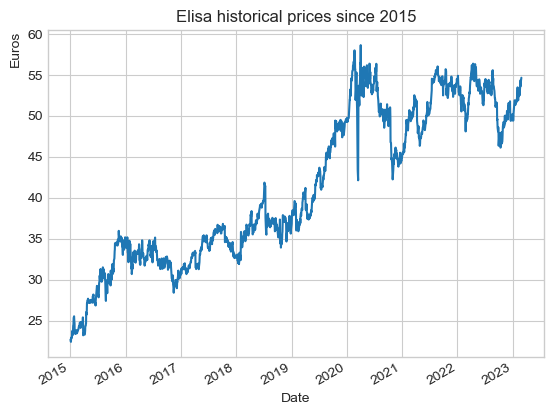

In [5]:
### Plot Elisa's historical prices, use daily closing prices.

elisa['Close'].plot()

### Add title and axis-titles

plt.title('Elisa historical prices since 2015')
plt.ylabel('Euros', loc='top')

Text(0, 1, 'Euros')

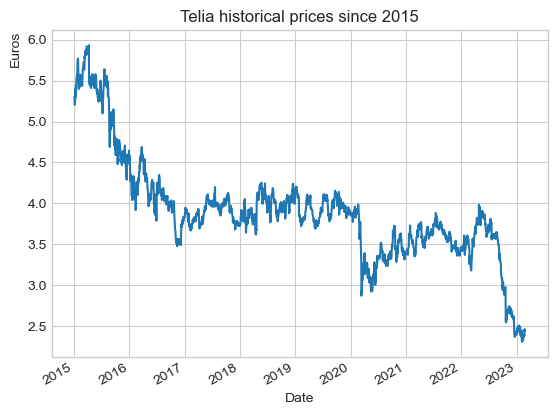

In [6]:
### Same for Telia's historical closing prices.

telia['Close'].plot()

### Add title and axis-titles

plt.title('Telia historical prices since 2015')
plt.ylabel('Euros', loc='top')

Text(0, 0.5, 'Euros')

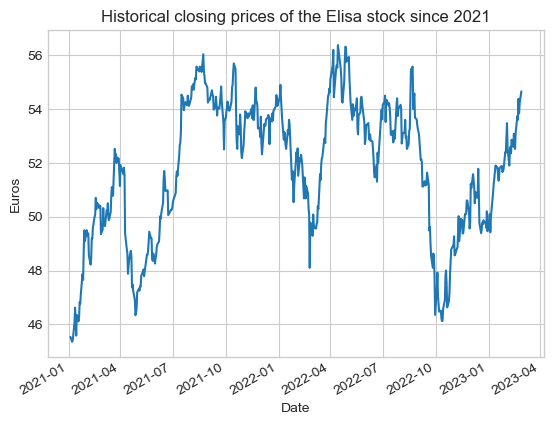

In [7]:
### Plot from the beginning of 2021

elisa['Close']['2021':].plot()

### Add title and axis-titles

plt.title('Historical closing prices of the Elisa stock since 2021')
plt.ylabel('Euros')


Text(0, 0.5, 'Euros')

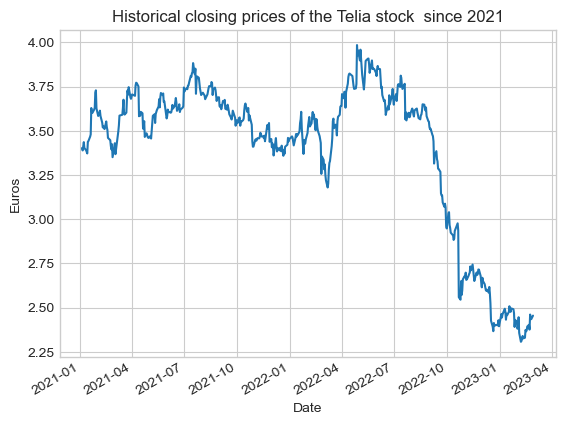

In [8]:
### Do the same for the Telia stock

### Plot from the beginning of 2021

telia['Close']['2021':].plot()

### Add title and axis-titles

plt.title('Historical closing prices of the Telia stock  since 2021')
plt.ylabel('Euros')


### Aggregation

We can use **resample()** in order to aggregate a time series from one level to another, e.g. from daily series to monthly series.

Parameters for the function resample() that can be used can be found at:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In the following there are examples of aggregation. Notice that in all of them the previous data with historical daily stock prices is used.

Text(0, 0.5, 'Euros')

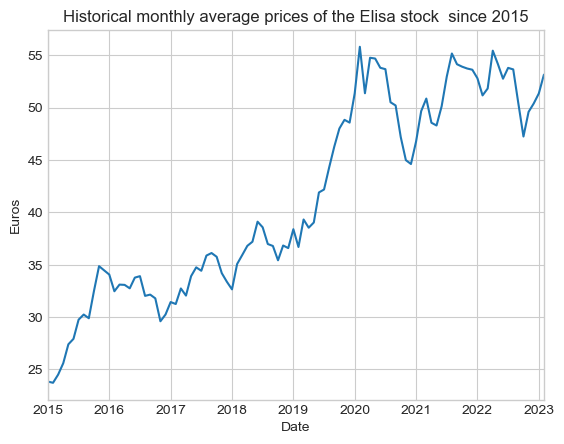

In [9]:
### Calculate monthly average prices using the previous daily data.

elisa['Close'].resample('M').mean().plot()

### Add title and axis-titles

plt.title('Historical monthly average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

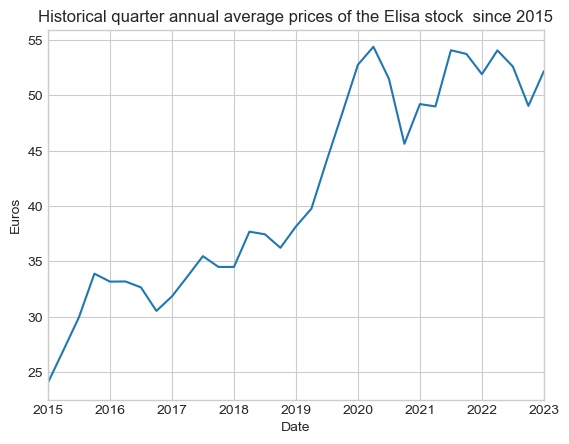

In [10]:
### Quarter annual average prices

elisa['Close'].resample('Q').mean().plot()

### Add title and axis-titles

plt.title('Historical quarter annual average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

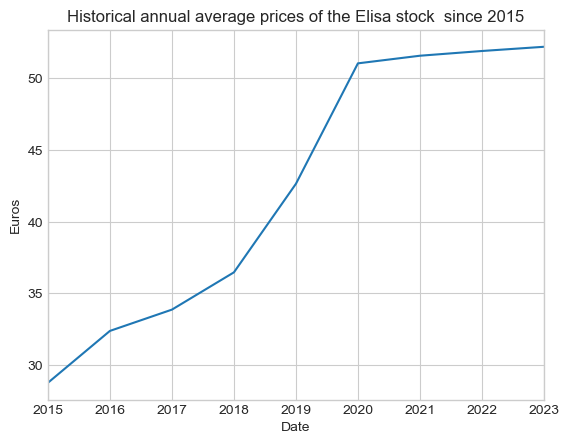

In [11]:
### Annual mean prices

elisa['Close'].resample('Y').mean().plot()

plt.title('Historical annual average prices of the Elisa stock  since 2015')
plt.ylabel('Euros')

Text(0, 0.5, 'Euros')

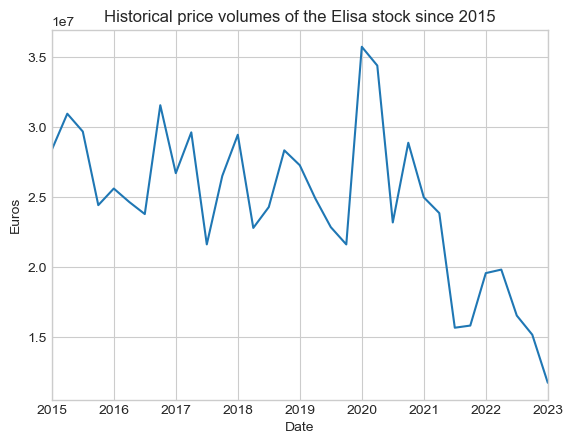

In [12]:
### The number of volume quarter annually

elisa['Volume'].resample('Q').sum().plot()

plt.title('Historical price volumes of the Elisa stock since 2015')
plt.ylabel('Euros')

### Moving averages

Moving averages are used to smooth down isolated price spikes.

In stock markets' technical analysis intersection points of time series and their moving averages have special interests. 

<AxesSubplot: xlabel='Date'>

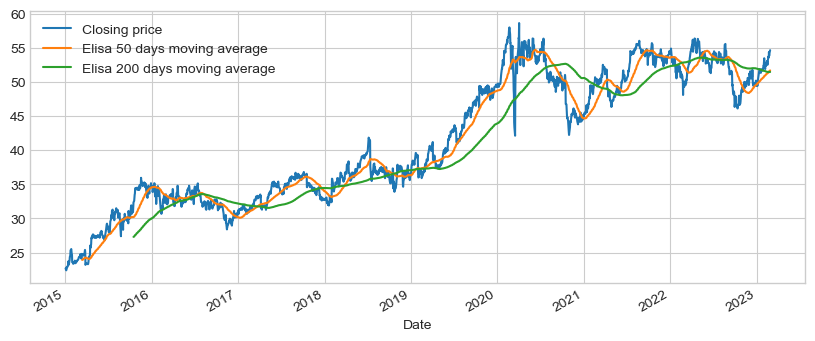

In [13]:
### Consider Elisa's stock markets and daily closing values

elisa['Close'].plot(figsize=(10,4), legend=True, label = 'Closing price')

### Add 50 and 200 days moving averages to the line chart

elisa['Close'].rolling(50).mean().plot(legend = True, label = 'Elisa 50 days moving average')
elisa['Close'].rolling(200).mean().plot(legend = True, label = 'Elisa 200 days moving average')


How would you analyze the development of the stock price? Can you identify any signs of golden cross or death cross? If so, what would be the menaing of the found cross? See, e.g. <a href="https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp">Investopedia's article</a> about this for more information.

## Percentages of changes

It's convinient to calculate percentages of changes using the function **pct_change()**.

In [14]:
### Changes of stock prices from the previous day as percentages

elisa['Elisa-daily%'] = elisa['Close'].pct_change()
telia['Telia-daily%'] = telia['Close'].pct_change()

In [15]:
### Dataframes elisa and telia now have a new column
elisa

,Open,High,Low,Close,Adj Close,Volume,Elisa-daily%
Date,,,,,,,
2015-01-02,22.610001,22.870001,22.549999,22.680000,16.190426,206279,NaN
2015-01-05,22.700001,22.850000,22.309999,22.400000,15.990539,249378,-0.012346
2015-01-07,22.500000,23.139999,22.100000,22.920000,16.361752,531047,0.023214
2015-01-08,22.900000,23.200001,22.760000,22.830000,16.297503,381383,-0.003927
2015-01-09,22.809999,23.120001,22.760000,22.860001,16.318920,305832,0.001314
...,...,...,...,...,...,...,...
2023-02-21,53.660000,54.000000,53.500000,53.599998,53.599998,183047,-0.002605
2023-02-22,53.619999,54.459999,53.500000,54.380001,54.380001,322831,0.014552
2023-02-23,54.439999,54.520000,53.720001,53.840000,53.840000,167243,-0.009930


In [16]:
### Next add percentage changes into a same dataframe

changes = pd.concat([elisa['Elisa-daily%'], telia['Telia-daily%']], axis = 1)

### In case there are missing values in closing prices (no sales is done), that results in missing values in percentages of changes as well.
### These missing values can be replaced by a zero percentage of change using the function fillna as follows:

changes = changes.fillna(0)

Text(0, 0.5, 'Change')

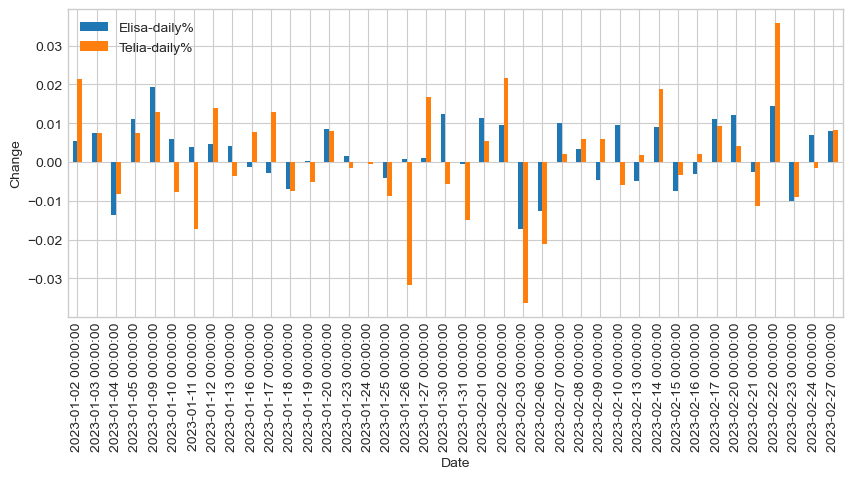

In [17]:
### View changes from the beginning of the year 2022

changes['2023':].plot.bar(figsize=(10, 4))

### Vertical axis title
plt.ylabel('Change')


In [18]:
### Statistical numbers for percentages of changes

changes.describe().style.format('{:.4f}')

,Elisa-daily%,Telia-daily%
count,2052.0000,2052.0000
mean,0.0005,-0.0003
std,0.0140,0.0142
min,-0.0922,-0.1345
25%,-0.0061,-0.0069
50%,0.0008,0.0000
75%,0.0076,0.0073
max,0.1640,0.1100


In [19]:
### Calculate the number of days the percentage of change has been greater than five per cent

changes[(abs(changes['Elisa-daily%']) > 0.05) | (abs(changes['Telia-daily%']) > 0.05)]

,Elisa-daily%,Telia-daily%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


## Is there a connection between weekdays and profit rate?

In [20]:
### Add weekdays to a column of their own (zero = Monday)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

changes['Weekday'] = changes.index.weekday

### Elisa's statistical numbers by weekdays

elisa_weekday = changes.groupby('Weekday')['Elisa-daily%'].describe()
elisa_weekday.index = weekdays

elisa_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,409.0,0.001813,0.012653,-0.055172,-0.004620,0.001512,0.008557,0.057805
Tue,416.0,0.000940,0.014682,-0.038976,-0.006553,0.000824,0.007420,0.164016
Wed,418.0,0.000722,0.012473,-0.053899,-0.005578,0.000335,0.007659,0.059656
Thu,410.0,-0.000334,0.014512,-0.084077,-0.007067,0.000293,0.007039,0.068757
Fri,399.0,-0.000546,0.015266,-0.092226,-0.006348,0.000805,0.007297,0.061796


In [21]:
### Telia's statistical numbers by weekdays

telia_weekday = changes.groupby('Weekday')['Telia-daily%'].describe()
telia_weekday.index = weekdays

telia_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,409.0,0.000068,0.013795,-0.079728,-0.006637,0.000000,0.007585,0.041424
Tue,416.0,0.000918,0.013866,-0.046268,-0.005905,0.000000,0.007354,0.109976
Wed,418.0,-0.000111,0.013000,-0.061963,-0.006784,-0.000913,0.007394,0.058433
Thu,410.0,-0.001526,0.015213,-0.134499,-0.008130,0.000000,0.006627,0.051014
Fri,399.0,-0.000750,0.014970,-0.128406,-0.007110,0.000000,0.006981,0.083107


How would you answer to the question raised above, based on these figures?

## Correlation between percentages of changes

In [22]:
### Percentages of changes of Elisa and Telia have a positive correlation

changes.drop('Weekday', axis = 1).corr()

,Elisa-daily%,Telia-daily%
Elisa-daily%,1.000000,0.496934
Telia-daily%,0.496934,1.000000


<AxesSubplot: xlabel='Elisa-daily%', ylabel='Telia-daily%'>

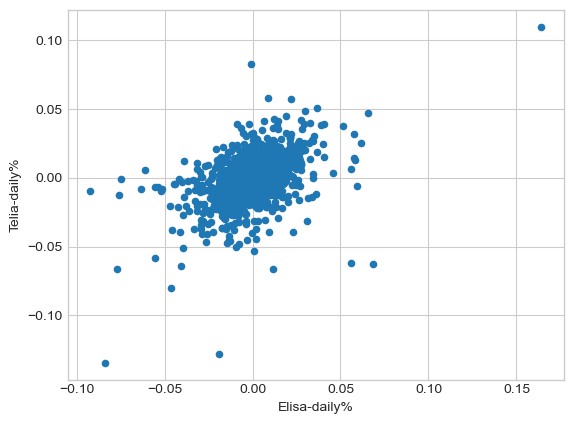

In [23]:
### Positive correlation between percentages of changes can be seen in the scatter chart

changes.plot.scatter(x = 'Elisa-daily%', y = 'Telia-daily%')

<AxesSubplot: xlabel='Date'>

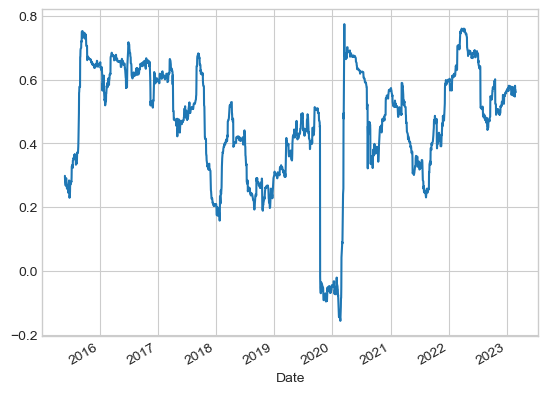

In [24]:
### Moving correlation describes how percentages of changes correlate at different times

changes['Elisa-daily%'].rolling(100).corr(changes['Telia-daily%']).plot()

## Moving volatility

Volatility describes the overall risk of a stock. It is announced as annual if the observation period is at least one year.

When calculating volatility standard deviation (std()) of percentage numbers of daily changes is determined and then it is transform to be annual when the deviation is multiplied by a square root of a factor that depends on the ratio of observation and destination data. In the following example this factor is assumed to be 254.

Moving volatility describes how volatility (i.e., risk) has changed over the time.

<AxesSubplot: xlabel='Date'>

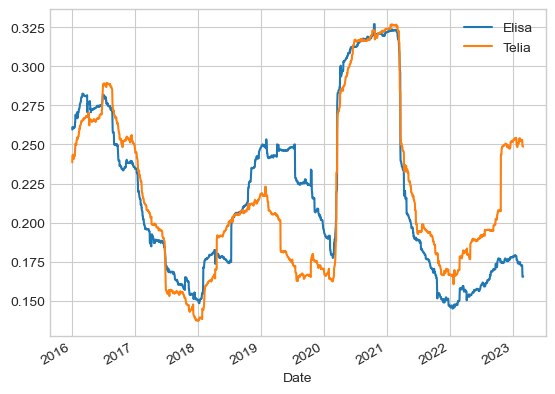

In [25]:
### Examples of moving volatility of 252 days

### Elisa stock
(changes['Elisa-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Elisa', legend = True)

### Telia stock
(changes['Telia-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Telia', legend = True)

## Line charts with two axis

Elisa and Telia stock prices are of different order. They can be drawn in one chart if two axes are used. 

(2.0, 6.0)

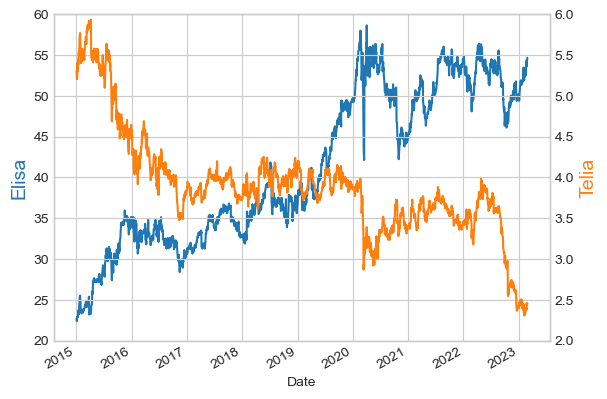

In [26]:
### Line chart of Elisa stocks closing prices.

axe = elisa['Close'].plot(color = 'C0')

### Add name for Elisa, colour and font size.

plt.ylabel('Elisa', color = 'C0', fontsize = 14)

### Scale the value axis of Elisa

plt.ylim(20, 60)

### Next we create another axes object (called axt) and determine it to have a common x-axis with the object axe.

axt = axe.twinx()

### Line chart of Telia stock closing prices

telia['Close'].plot(ax = axt, color ='C1')

### Add name for Telia, colour and font size.

plt.ylabel('Telia', color = 'C1', fontsize = 14)

### Scale the value axis of Telia

plt.ylim(2, 6)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [27]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-02-27 21:36 by Juha Nurmonen
